In [464]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from keras.models import Sequential,Model
from keras.layers import Dense
from keras.layers import LSTM,SimpleRNN
from keras.layers import Dropout,GRU,Flatten
from keras.layers import TimeDistributed
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential, load_model
import tensorflow as tf
from keras.optimizers import Adam,Adamax,Nadam
import matplotlib.pyplot as plt

# Loading the Generative model from the GAN and printing the model Summary

In [465]:
adam = Adam(learning_rate = 3E-2)
model = load_model("C:/Users/HOME PC/Desktop/machine learning/Exoplanet generation/Exoplane_host_star_detection-master/models/results/gan_trial2")
new_model = Model(model.get_layer("sequential_2").input,model.get_layer("sequential_2").output)
print(model.summary())
print(new_model.summary())
#new_model.load_weights("C:/Users/HOME PC/Desktop/machine learning/Exoplanet generation/Exoplane_host_star_detection-master/models/results/generator_weights2.h5")

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
sequential_2 (Sequential)    (None, 1599, 1)           3265599   
_________________________________________________________________
sequential_3 (Sequential)    (None, 1)                 986753    
Total params: 4,252,352
Trainable params: 4,252,352
Non-trainable params: 0
_________________________________________________________________
None
Model: "functional_75"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5_input (InputLayer)   [(None, 100)]             0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               51712     
________________

# Generate a few fake transit curves

<Figure size 432x288 with 0 Axes>

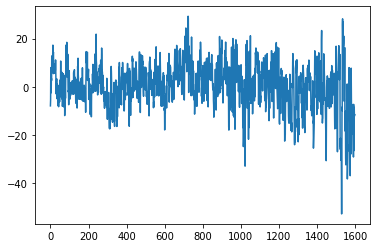

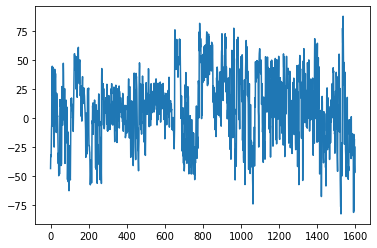

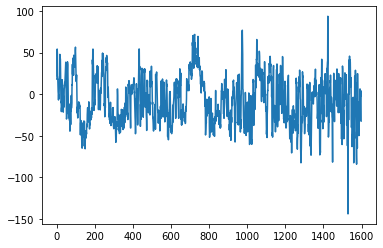

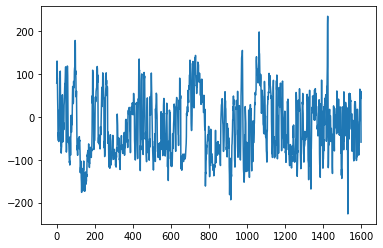

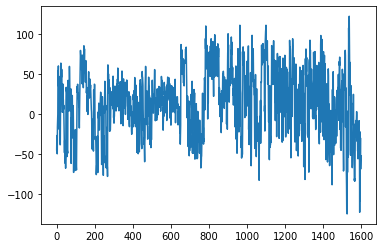

In [466]:
batch_size = 5
noise = np.random.normal(0,1,[batch_size,100])
test = new_model.predict(noise)
def printer():
    fig =plt.figure()
    for i in range(0,batch_size):
        plt.figure()
        plt.plot(test[i])
    plt.show()
printer()



# Setting up the BATMAN package

In [467]:
import batman
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

(100,)
(100, 1)
(100,)


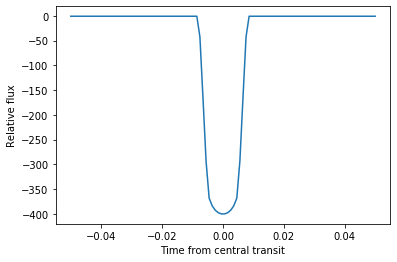

In [468]:
params = batman.TransitParams()
params.t0 = 0.                       #time of inferior conjunction
params.per = 1.                      #orbital period
params.rp = 0.1                      #planet radius (in units of stellar radii)
params.a = 15.                       #semi-major axis (in units of stellar radii)
params.inc = 87.                     #orbital inclination (in degrees)
params.ecc = 0.                      #eccentricity
params.w = 90.                       #longitude of periastron (in degrees)
params.u = [0.1, 0.3]                #limb darkening coefficients [u1, u2]
params.limb_dark = "quadratic"       #limb darkening model


t = np.linspace(-0.05, 0.05, 100)

m = batman.TransitModel(params, t)    #initializes model
flux = m.light_curve(params)
print(flux.shape)
flux = np.reshape(flux,(-1,1))
scaler = MinMaxScaler((-400,-1))
scaler.fit(flux)
flux = scaler.transform(flux)
print(flux.shape)
flux = np.reshape(flux,(100,))
print(flux.shape)


plt.plot(t,flux)
plt.xlabel("Time from central transit")
plt.ylabel("Relative flux")
plt.show()

# An example of creating periodic lightcurves observed over a longer period of time

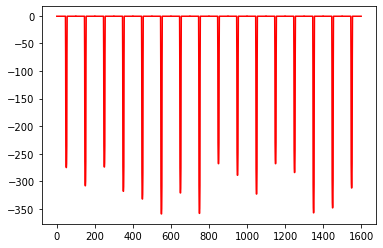

(1600,)


In [469]:
params = batman.TransitParams()
params.t0 = 0.                       #time of inferior conjunction
params.per = 0.5                      #orbital period
params.rp = 0.1                      #planet radius (in units of stellar radii)
params.a = 15.                       #semi-major axis (in units of stellar radii)
params.inc = 87.                     #orbital inclination (in degrees)
params.ecc = 0.                      #eccentricity
params.w = 90.                       #longitude of periastron (in degrees)
params.u = [0.1, 0.3]                #limb darkening coefficients [u1, u2]
params.limb_dark = "quadratic"       #limb darkening model


time = np.linspace(0, 500, 10)
arr =np.array([])
for i in range(0,1544,100):
        t=np.linspace(i,100+i,100)                          
        new_flux = m.light_curve(params) 
        
        #rescale the generated flux in the range
        #240 and 360 to match the size
        new_flux = np.reshape(new_flux,(-1,1))
        variable = np.random.randint(240,360)
        scaler = MinMaxScaler((-variable,-1))
        scaler.fit(new_flux)
        new_flux = scaler.transform(new_flux)
        new_flux = np.reshape(new_flux,(100,))
        arr= np.append(arr,new_flux)
        
        
        plt.plot(t,new_flux,color ="r")
plt.show()
print(arr.shape)


# Combine BATMAN with the GAN generated lightcurves

(5, 1599, 1)
generated shape:  (1599,)
generated_A shape:  (6, 1599)
curves shape: (5, 1599)


printing graphs:


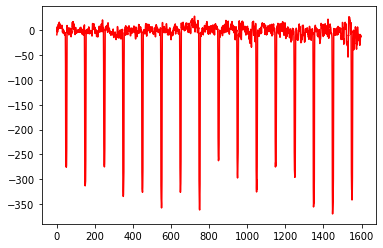

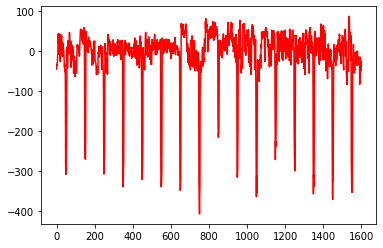

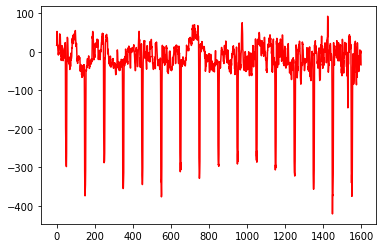

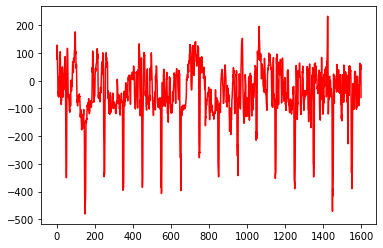

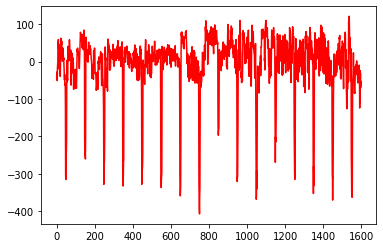

In [470]:
from sklearn.preprocessing import MinMaxScaler

generated_A = np.array([[0 for i in range(min(len(curve),len(arr)))]])

curves = test
print(test.shape)
for curve in curves:
    generated = np.array([])
    for i in range(min(len(curve),len(arr))):
        generated =np.append(generated,[curve[i][0]+arr[i]])
    generated_A = np.append(generated_A,[generated],axis =0)


print("generated shape: ",generated.shape)
print("generated_A shape: ",generated_A.shape)
curves = np.reshape(curves,(curves.shape[0],curves.shape[1]))
print("curves shape:",curves.shape)
print("\n")
print("printing graphs:")
for generated in generated_A[1:,:]:
    plt.figure()
    plt.plot(generated,c="r")
plt.show()


# Testing the code on an LSTM network

In [471]:
Classifier= Model(model.get_layer("sequential_3").input,model.get_layer("sequential_3").output)
print(Classifier.summary())

Model: "functional_77"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3_input (InputLayer)    [(None, 1599, 1)]         0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 1599, 256)         264192    
_________________________________________________________________
dropout_3 (Dropout)          (None, 1599, 256)         0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 1599, 256)         525312    
_________________________________________________________________
dropout_4 (Dropout)          (None, 1599, 256)         0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 128)               197120    
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)             

In [472]:
Classifier2 = load_model("classifier_trial3.h5")
print(Classifier2.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 1, 256)            1900544   
_________________________________________________________________
dropout_9 (Dropout)          (None, 1, 256)            0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 1, 256)            525312    
_________________________________________________________________
dropout_10 (Dropout)         (None, 1, 256)            0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 128)               197120    
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

Normalizing...
Applying Gaussian filter...
Applying MinMaxScaler...


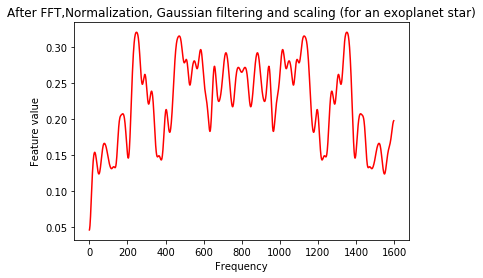

In [473]:
from scipy.fftpack import fft,ifft
Xtest = generated_A
Xtest=np.abs(fft(Xtest,n=len(Xtest[2]),axis=1))

from sklearn.preprocessing import normalize

print('Normalizing...')
Xtest=normalize(Xtest)

from scipy import ndimage

print('Applying Gaussian filter...')
Xtest=ndimage.filters.gaussian_filter(Xtest,sigma=10)

from sklearn.preprocessing import MinMaxScaler

print('Applying MinMaxScaler...')
scaler=MinMaxScaler(feature_range=(0,1))

Xtest=scaler.fit_transform(Xtest)

plt.plot(Xtest[2],'r')
plt.title('After FFT,Normalization, Gaussian filtering and scaling (for an exoplanet star)')
plt.xlabel('Frequency')
plt.ylabel('Feature value')
plt.show()

curves=np.abs(fft(curves,n=len(curves[2]),axis=1))
curves=normalize(curves)
curves=ndimage.filters.gaussian_filter(curves,sigma=10)
scaler=MinMaxScaler(feature_range=(0,1))
curves=scaler.fit_transform(curves)



In [474]:
generated_A = np.reshape(generated_A,(generated_A.shape[0],1,generated_A.shape[1]))
curves = np.reshape(curves,(curves.shape[0],1,curves.shape[1]))


print(generated_A.shape)
y2 = Classifier2.predict(curves)
y = Classifier2.predict(generated_A)
for i in range(len(y2)):
    print("prediction:",i," confidence with BATMAN: ",y[i][0]*100,"%", "  confidence without BATMAN: ",y2[i][0]*100,"%")



(6, 1, 1599)
prediction: 0  confidence with BATMAN:  48.43520224094391 %   confidence without BATMAN:  0.06662905216217041 %
prediction: 1  confidence with BATMAN:  50.890904664993286 %   confidence without BATMAN:  0.025722384452819824 %
prediction: 2  confidence with BATMAN:  54.1570782661438 %   confidence without BATMAN:  0.1146852970123291 %
prediction: 3  confidence with BATMAN:  50.89162588119507 %   confidence without BATMAN:  0.030881166458129883 %
prediction: 4  confidence with BATMAN:  58.09440016746521 %   confidence without BATMAN:  0.006302897236309946 %
